Demonstrates testing equality of samples generated from different distributions with the same summary statistics.

Requires matplotlib, scipy

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats.sampling import NumericalInversePolynomial

import sbsr

mean = 0.0
variance = 4.0


class NormalDistribution:
    
    def __init__(self, mean, variance):
        
        self.a = mean
        self.b = np.sqrt(variance)
    
    def pdf(self, x):
        dx = (x - self.a) / self.b
        dx2 = np.multiply(dx, dx) * -0.5
        return np.exp(dx2) / self.b / np.sqrt(np.pi * 2)


class LaplaceDistribution:

    def __init__(self, mean, variance):
        
        self.a = mean
        self.b = np.sqrt(variance / 2)
    
    def pdf(self, x):
        return np.exp(np.abs(x - self.a) / -self.b) / self.b / 2


class UniformDistribution:
    
    def __init__(self, mean, variance):
        
        self.w = np.sqrt(12 * variance)
        self.a = mean - self.w / 2

    def pdf(self, x):
        if isinstance(x, float):
            return 1 / self.w if self.a <= x <= self.a + self.w else 0.0
        result = np.zeros_like(x)
        result[x >= self.a] = 1 / self.w
        result[x > self.a + self.w] = 0.0
        return result


class LogisticDistribution:
    
    def __init__(self, mean, variance):
        
        self.a = mean
        self.b = np.sqrt(3 * variance) / np.pi

    def pdf(self, x):
        f = np.exp((x - self.a) / -self.b)
        g = f + 1
        return np.divide(f, np.multiply(g, g)) / self.b

C:\Users\timothy.sego\AppData\Local\Temp\ipykernel_318308\3601384203.py:61: RuntimeWarning: invalid value encountered in divide
  return np.divide(f, np.multiply(g, g)) / self.b


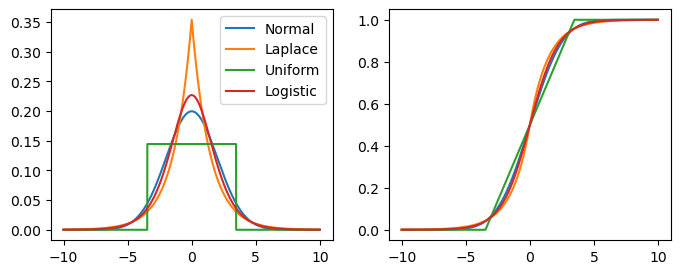

In [2]:
x_test = np.arange(start=-10.0, stop=10.0, step=0.01)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(x_test, NormalDistribution(mean, variance).pdf(x_test), label='Normal')
ax[0].plot(x_test, LaplaceDistribution(mean, variance).pdf(x_test), label='Laplace')
ax[0].plot(x_test, UniformDistribution(mean, variance).pdf(x_test), label='Uniform')
ax[0].plot(x_test, LogisticDistribution(mean, variance).pdf(x_test), label='Logistic')
ax[0].legend()

urng = np.random.default_rng()
dist_norm = NumericalInversePolynomial(NormalDistribution(mean, variance), random_state=urng)
dist_lplc = NumericalInversePolynomial(LaplaceDistribution(mean, variance), random_state=urng)
dist_ufrm = NumericalInversePolynomial(UniformDistribution(mean, variance), random_state=urng)
dist_lgsc = NumericalInversePolynomial(LogisticDistribution(mean, variance), random_state=urng)

ax[1].plot(x_test, dist_norm.cdf(x_test), label='Normal')
ax[1].plot(x_test, dist_lplc.cdf(x_test), label='Laplace')
ax[1].plot(x_test, dist_ufrm.cdf(x_test), label='Uniform')
ax[1].plot(x_test, dist_lgsc.cdf(x_test), label='Logistic')

Sample 1 means    : 0.011550854515865058 0.03060995274580414 0.02354203546857266 0.038077378812058964
Sample 2 means    : -0.022825148806878134 0.02280030700635949 0.018285410275591097 0.011952823214503278
Sample 1 variances: 4.054430338443889 4.023809506720265 3.9930240990804147 3.990880114570738
Sample 2 variances: 3.9488499096286076 3.965060784056491 4.035070565979778 4.043630461273177


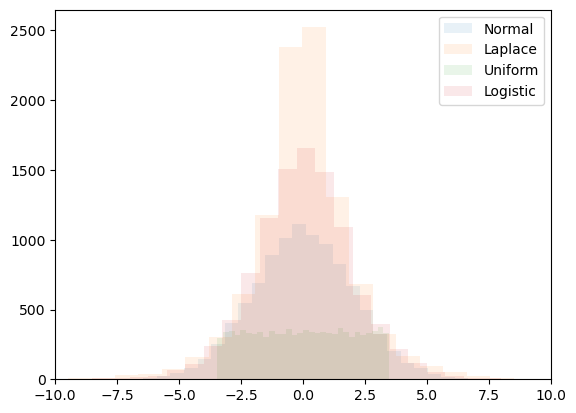

In [3]:
sample_size = 10000

sample_norm = dist_norm.rvs(sample_size)
sample_lplc = dist_lplc.rvs(sample_size)
sample_ufrm = dist_ufrm.rvs(sample_size)
sample_lgsc = dist_lgsc.rvs(sample_size)

sample_norm_2 = dist_norm.rvs(sample_size)
sample_lplc_2 = dist_lplc.rvs(sample_size)
sample_ufrm_2 = dist_ufrm.rvs(sample_size)
sample_lgsc_2 = dist_lgsc.rvs(sample_size)

print('Sample 1 means    :', np.mean(sample_norm), np.mean(sample_lplc), np.mean(sample_ufrm), np.mean(sample_lgsc))
print('Sample 2 means    :', np.mean(sample_norm_2), np.mean(sample_lplc_2), np.mean(sample_ufrm_2), np.mean(sample_lgsc_2))
print('Sample 1 variances:', np.var(sample_norm), np.var(sample_lplc), np.var(sample_ufrm), np.var(sample_lgsc))
print('Sample 2 variances:', np.var(sample_norm_2), np.var(sample_lplc_2), np.var(sample_ufrm_2), np.var(sample_lgsc_2))

fig, ax = plt.subplots(1, 1)
alpha = 0.1
bins = 30
ax.hist(sample_norm, alpha=alpha, bins=bins, label='Normal')
ax.hist(sample_lplc, alpha=alpha, bins=bins, label='Laplace')
ax.hist(sample_ufrm, alpha=alpha, bins=bins, label='Uniform')
ax.hist(sample_lgsc, alpha=alpha, bins=bins, label='Logistic')
ax.set_xlim(-10, 10)
ax.legend()

In [4]:
eval_num = 100
eval_per = 3
eval_fin = 2 * eval_per * np.pi / np.sqrt(variance)
eval_t = sbsr.get_eval_info_times(eval_num, eval_fin)

ecf_norm = sbsr.ecf(sample_norm, eval_t)
ecf_lplc = sbsr.ecf(sample_lplc, eval_t)
ecf_ufrm = sbsr.ecf(sample_ufrm, eval_t)
ecf_lgsc = sbsr.ecf(sample_lgsc, eval_t)

ecf_norm_2 = sbsr.ecf(sample_norm_2, eval_t)
ecf_lplc_2 = sbsr.ecf(sample_lplc_2, eval_t)
ecf_ufrm_2 = sbsr.ecf(sample_ufrm_2, eval_t)
ecf_lgsc_2 = sbsr.ecf(sample_lgsc_2, eval_t)

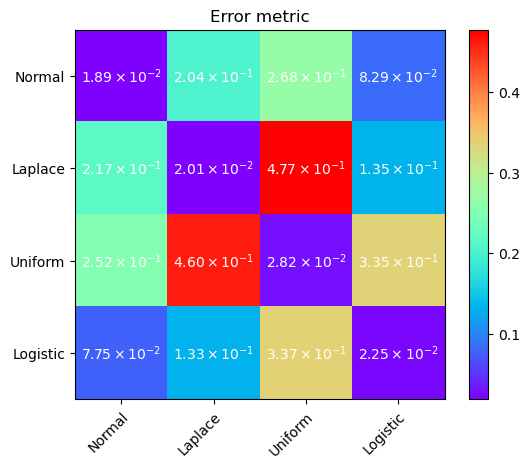

In [5]:
ecf_all = [ecf_norm, ecf_lplc, ecf_ufrm, ecf_lgsc]
ecf_all_2 = [ecf_norm_2, ecf_lplc_2, ecf_ufrm_2, ecf_lgsc_2]
labels_all = ['Normal', 'Laplace', 'Uniform', 'Logistic']
err_mat = np.ndarray((len(ecf_all), len(ecf_all)), dtype=float)

for i, ecf_i in enumerate(ecf_all):
    for j, ecf_j in enumerate(ecf_all_2):
        err_mat[i, j] = sbsr.ecf_compare(ecf_i, ecf_j)

fig, ax = plt.subplots()
im = ax.imshow(err_mat, cmap='rainbow')

def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    st = r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))
    return r"${0:s}$".format(st)

ax.set_xticks(np.arange(len(labels_all)), labels=labels_all)
ax.set_yticks(np.arange(len(labels_all)), labels=labels_all)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
for i in range(len(labels_all)):
    for j in range(len(labels_all)):
        text = ax.text(j, i, as_si(err_mat[i, j], 2), ha='center', va='center', color='w')
ax.set_title('Error metric')
fig.colorbar(im)

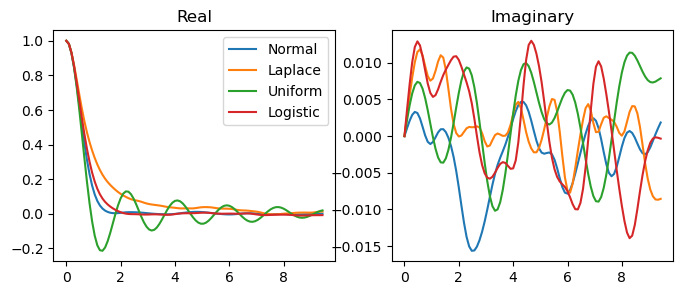

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
for i in range(2):
    ax[i].plot(eval_t, ecf_norm[:, i], label='Normal')
    ax[i].plot(eval_t, ecf_lplc[:, i], label='Laplace')
    ax[i].plot(eval_t, ecf_ufrm[:, i], label='Uniform')
    ax[i].plot(eval_t, ecf_lgsc[:, i], label='Logistic')
ax[0].set_title('Real')
ax[1].set_title('Imaginary')
ax[0].legend()

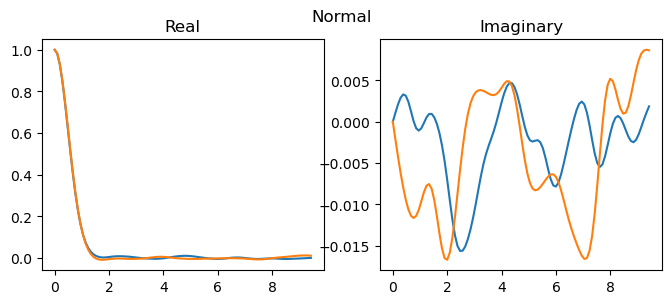

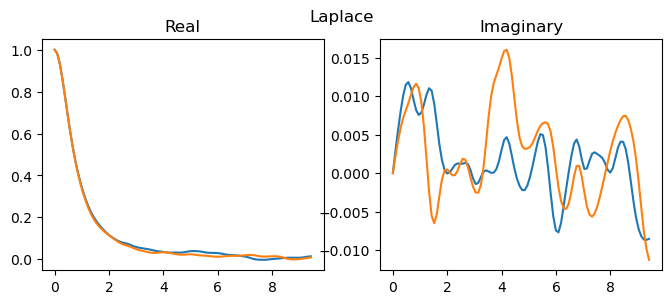

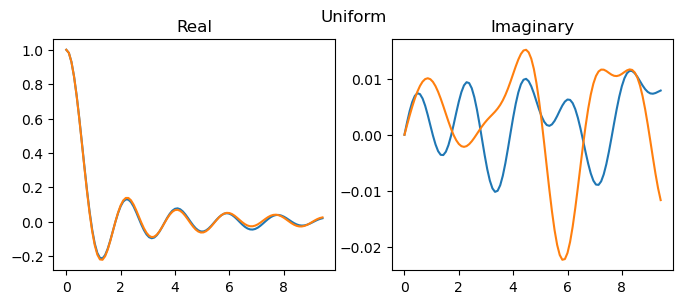

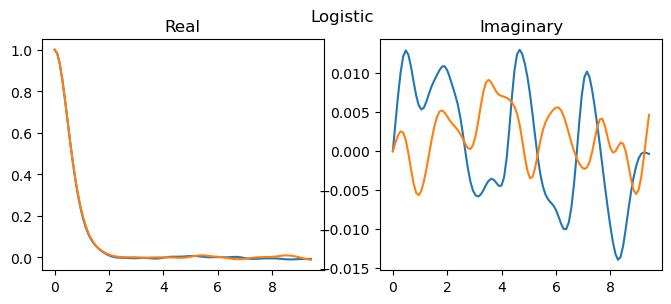

In [7]:
for i in range(len(ecf_all)):
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    for j in range(2):
        ax[j].plot(eval_t, ecf_all[i][:, j])
        ax[j].plot(eval_t, ecf_all_2[i][:, j])
    ax[0].set_title('Real')
    ax[1].set_title('Imaginary')
    fig.suptitle(labels_all[i])